## environment setting

In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## preprocessing the raw data

In [ ]:
import csv
import pandas as pd
import re

In [ ]:
# load data
from glob import glob

to_sc = glob('/content/drive/MyDrive/tm_wipo/*.csv')

In [ ]:
to_sc

['/content/drive/MyDrive/tm_wipo/WIPO AI_sourcefile(20230818).csv']

In [ ]:
dfs = []
for i in range(len(to_sc)):
    globals()['df_vr_{}'.format(i)] = pd.read_csv(to_sc[i], engine='python', encoding = "utf-8", error_bad_lines=False)
    dfs.append(globals()['df_vr_{}'.format(i)])

<ipython-input-9-0769a77572c9>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  globals()['df_vr_{}'.format(i)] = pd.read_csv(to_sc[i], engine='python', encoding = "utf-8", error_bad_lines=False)


In [ ]:
# for df in dfs:
#     df.drop_duplicates(['patent_content'], inplace=True)

In [ ]:
# 중복 제거한 DataFrame을 하나의 DataFrame으로 병합
merged_df = pd.concat(dfs, ignore_index=True)
new_df = merged_df[['patent_content', 'patent_date']].copy()

In [ ]:
# new_df = new_df[~new_df['patent_content'].str.contains('pet', na=False)]
# new_df = new_df[~new_df['patent_content'].str.contains('juego', na=False)]
# new_df = new_df[~new_df['patent_content'].str.contains('poker', na=False)]
# new_df = new_df[~new_df['patent_content'].str.contains('card', na=False)]
# new_df = new_df[~new_df['patent_content'].str.contains('dealer|casino|roulette|pachinko', na=False)]

In [ ]:
df_without_null = new_df.dropna().reset_index(drop=True)

In [ ]:
# Change date to datetime format
df_without_null['patent_date'] = pd.to_datetime(df_without_null['patent_date'], format='%d.%m.%Y',  errors='coerce')
df_without_null.dropna(subset=['patent_date'], inplace=True)

In [ ]:
# df_without_null.drop_duplicates(subset='patent_content', inplace=True)

In [ ]:
df_without_null

,patent_content,patent_date
0,Hockey and Any All sports Hall Of Fame (baseba...,2016-02-18
1,The invention discloses a sports equipment car...,2018-05-29
2,A portable apparatus for making athletic nets ...,1996-03-18
3,The present invention relates to an automated ...,2022-03-11
4,AI based 3-wheeled high-power mountain e-bike ...,2022-03-04
...,...,...
4747,This method is an attempt to utilize the knowl...,2013-12-20
4748,A social media platform is provided for sharin...,2011-09-15
4749,The invention relates to model selection of a ...,2010-09-15
4750,An indirect calorimeter estimates nutritional ...,2009-09-24


In [ ]:
import seaborn as sns
sns.__version__

'0.12.2'

<Axes: xlabel='year', ylabel='count'>

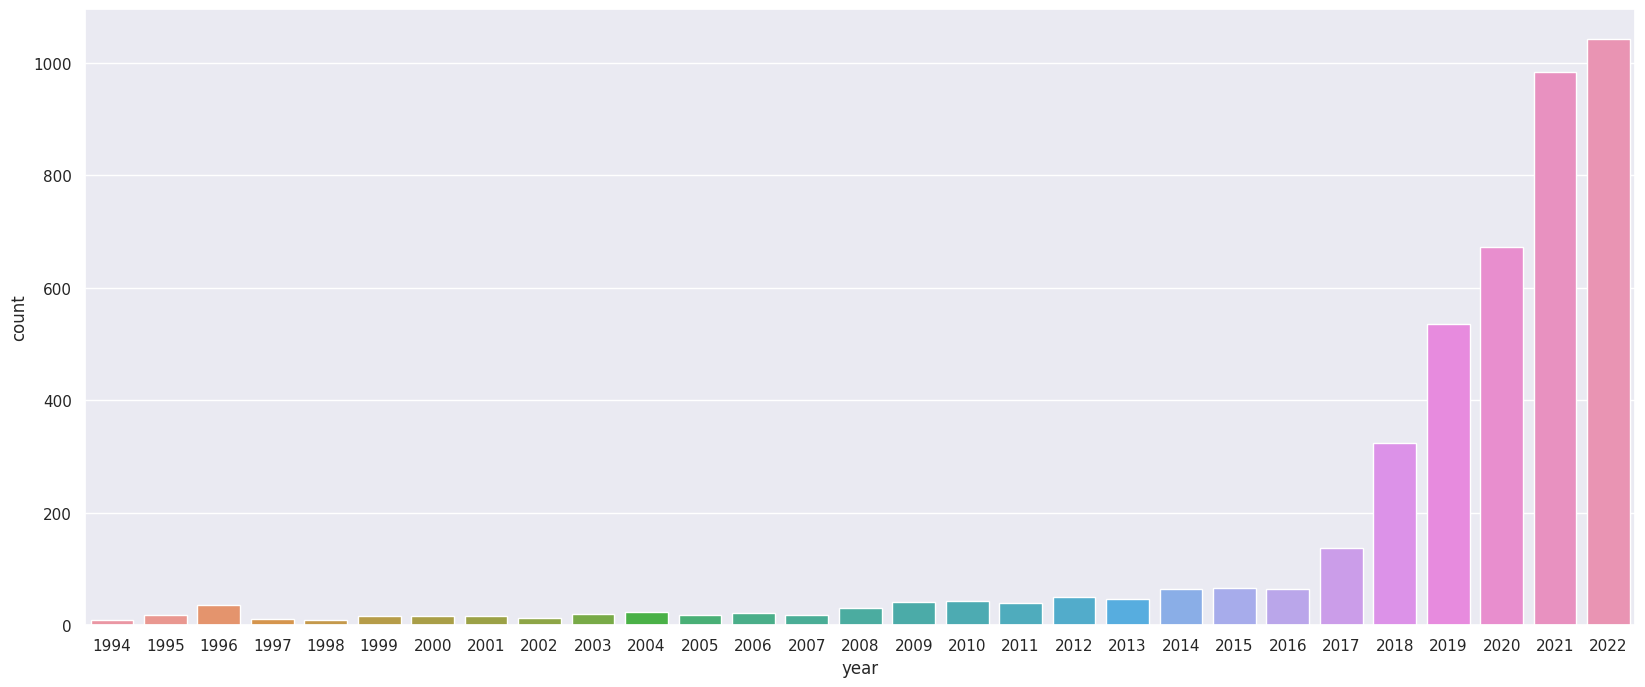

In [ ]:
# Visualization
import seaborn as sns
# Create the year variable
df_without_null['year'] = pd.DatetimeIndex(df_without_null['patent_date']).year
df_without_null['year'] = df_without_null['year'].astype(int)

df_without_null= df_without_null[df_without_null['year']>=1994]
df_without_null= df_without_null[df_without_null['year']<2023]
# Count plot
sns.set(rc={'figure.figsize':(20, 8)})
sns.countplot(df_without_null, x='year')

In [ ]:
data_above_1994 = df_without_null.loc[df_without_null['year'] >= 1994].reset_index(drop=True)
data_above_1994['patent_content'] = data_above_1994['patent_content'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))
data_above_1994['patent_content'] = data_above_1994['patent_content'].str.lower()
data_above_1994

,patent_content,patent_date,year
0,hockey and any all sports hall of fame baseba...,2016-02-18,2016
1,the invention discloses a sports equipment car...,2018-05-29,2018
2,a portable apparatus for making athletic nets ...,1996-03-18,1996
3,the present invention relates to an automated ...,2022-03-11,2022
4,ai based wheeled high power mountain e bike ...,2022-03-04,2022
...,...,...,...
4389,this method is an attempt to utilize the knowl...,2013-12-20,2013
4390,a social media platform is provided for sharin...,2011-09-15,2011
4391,the invention relates to model selection of a ...,2010-09-15,2010
4392,an indirect calorimeter estimates nutritional ...,2009-09-24,2009


# preprocess

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.__version__

'3.8.1'

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# NLTK English stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
wipo_related_words = ['object', 'invention', 'embodiment', 'problem', 'area', 'mean', 'provide', 'figure',
                      'copyright', 'result', 'input', 'may', 'virtual', 'target', 'method', 'first', 'vr', 'arranged',
                      'second', 'predetermined', 'pet', 'breeding', 'jpo', 'acoustic', 'musical', 'dimples', 'dimple', 'mm', 'total', 'betting',
                      'according', 'could', 'players', 'picking', 'one', 'two', 'includes', 'early', 'least']

In [ ]:
stopwords.extend(wipo_related_words)

In [ ]:
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    # stop_words = set(stopwords.words('english'))
    stop_words = set(stopwords)
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

In [ ]:
data_above_1994['preprocessed_content'] = data_above_1994['patent_content'].apply(preprocess_text)

# LDA topic modeling

In [ ]:
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import matplotlib.pyplot as plt

In [ ]:
import gensim

In [ ]:
gensim.__version__

'4.3.1'

In [ ]:
tokenized_documents = [word_tokenize(text) for text in data_above_1994['preprocessed_content']]

In [ ]:
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        # Train LDA model
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

        # Compute coherence score
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()

        # Save model and coherence value
        model_list.append(model)
        coherence_values.append(coherence_score)

    return model_list, coherence_values


In [ ]:
# Set the range of number of topics to try
start_topics = 2
end_topics = 23
step_size = 1

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus,
                                                       texts=tokenized_documents, start=start_topics,
                                                       limit=end_topics, step=step_size)


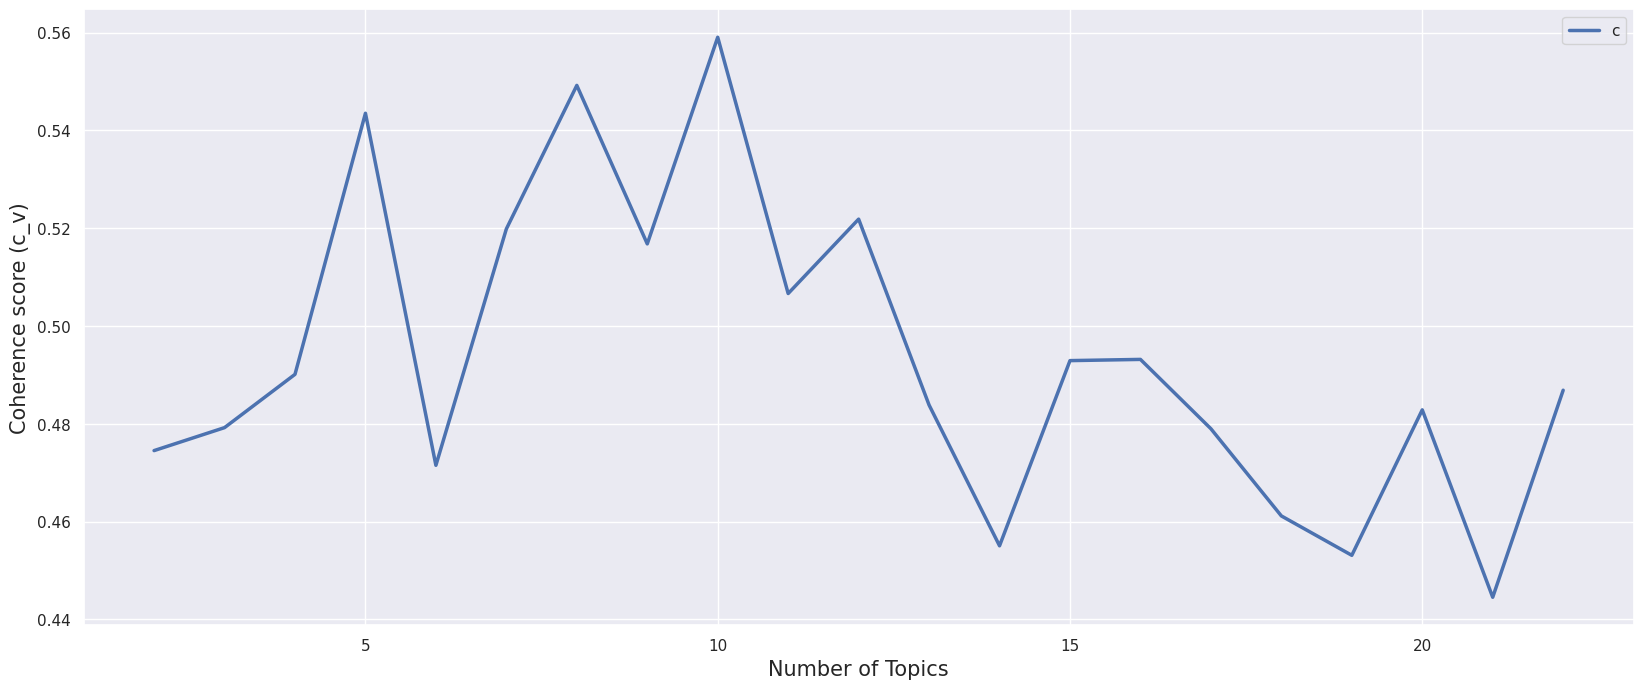

In [ ]:
import numpy as np

# Modified x-axis with specific values (4, 5, 10, 15, 20)
x = list(range(start_topics, end_topics, step_size))
specific_values = [ 5, 10, 15, 20]

# Set the tick positions and labels for specific values
plt.xticks(specific_values)

# Increase line width using the 'linewidth' parameter
plt.plot(x, coherence_values, linewidth=2.5)

plt.xlabel("Number of Topics", fontsize=15)  # Increase x-axis title font size to 14
plt.ylabel("Coherence score (c_v)", fontsize=15)  # Increase y-axis title font size to 14
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Find the optimal number of topics with the highest coherence score
optimal_index = coherence_values.index(max(coherence_values))
optimal_num_topics = start_topics + optimal_index
optimal_model = model_list[optimal_index]

In [ ]:
# Get the u_mass coherence value for the optimal model
coherence_model_umass = CoherenceModel(model=optimal_model, texts=tokenized_documents,
                                       dictionary=dictionary, coherence='u_mass')
coherence_umass = coherence_model_umass.get_coherence()


In [ ]:
# Print the optimal number of topics and coherence values
print("Optimal number of topics:", optimal_num_topics)
print("Coherence score (c_v):", max(coherence_values))
print("Coherence score (u_mass):", coherence_umass)

Optimal number of topics: 10
Coherence score (c_v): 0.5590534187356573
Coherence score (u_mass): -2.077829176399587


# result of LDA on optimal number of topics

In [ ]:
pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [ ]:
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=10,
                                   random_state=42,
                                   update_every=1,
                                   alpha='symmetric',
                                   per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 토픽과 각 토픽에 대한 단어들 출력
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.038*"data" + 0.023*"cycle" + 0.010*"based" + 0.010*"layer" + 0.010*"system" + 0.009*"value" + 0.009*"model" + 0.009*"user" + 0.008*"artificial" + 0.008*"intelligence"
Topic: 1 
Words: 0.017*"ai" + 0.017*"motion" + 0.015*"information" + 0.011*"unit" + 0.009*"image" + 0.009*"device" + 0.007*"breathed" + 0.007*"data" + 0.007*"segment" + 0.007*"user"
Topic: 2 
Words: 0.015*"material" + 0.011*"high" + 0.010*"cycle" + 0.009*"carbon" + 0.008*"battery" + 0.008*"pressure" + 0.008*"electrode" + 0.008*"preparation" + 0.007*"lithium" + 0.007*"substrate"
Topic: 3 
Words: 0.018*"data" + 0.018*"information" + 0.017*"system" + 0.015*"user" + 0.010*"device" + 0.010*"comprises" + 0.009*"exercise" + 0.009*"unit" + 0.008*"model" + 0.008*"equipment"
Topic: 4 
Words: 0.015*"body" + 0.010*"part" + 0.010*"sensor" + 0.010*"device" + 0.009*"module" + 0.009*"treadmill" + 0.008*"system" + 0.008*"control" + 0.007*"cleaning" + 0.007*"frame"
Topic: 5 
Words: 0.021*"spatial" + 0.020*"cycle" + 0.015

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install "pandas<2.0.0"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 16.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
# # 시각화
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary, mds='tsne')
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
